# Single label multiclass classification problem


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras import layers
import keras

(train_data, train_labels) , (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

# Data preparation

Decoding newswires back to text


In [ ]:
w_index = reuters.get_word_index()
reverse_w_index = dict([(value,key) for (key,value) in w_index.items()])
decoded_newswire = ' '.join([reverse_w_index.get(i-3, "?") for i in train_data[0]])# indices 0,1 and 2 are reserved for padding, start of sequence and unkown token
decoded_newswire

550378/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension= 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
        results[i, j] =1
    return results

In [ ]:
x_train =  vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
# One hot encoding function
def to_one_hot(labels, dimension):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
      results[i, label] = 1
    return results

y_train = to_one_hot(train_labels, dimension = 46)
y_test = to_one_hot(test_labels, dimension = 46)


# Model building


In [ ]:
# We use 64 dimensional layers as 16 dimensional layers may be unefficient to learn to classify 46 classes because if we used 16 dimensional layers information will be lost at each layer resulting in bad training

model = keras.Sequential([layers.Dense(64, activation = 'relu'), layers.Dense(64, activation='relu'), layers.Dense(46, activation='softmax')])

model.compile(optimizer='rmsprop', loss= 'categorical_crossentropy', metrics=['accuracy'])


# Model validation

In [ ]:
# Model validation

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train =  y_train[1000:]


In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 76ms/step - loss: 2.5413 - accuracy: 0.4850 - val_loss: 1.7179 - val_accuracy: 0.6370
Epoch 2/20
16/16 [==============================] - 1s 53ms/step - loss: 1.4610 - accuracy: 0.6859 - val_loss: 1.3366 - val_accuracy: 0.6880
Epoch 3/20
16/16 [==============================] - 1s 51ms/step - loss: 1.1315 - accuracy: 0.7561 - val_loss: 1.1478 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 53ms/step - loss: 0.9302 - accuracy: 0.8009 - val_loss: 1.0422 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.7646 - accuracy: 0.8334 - val_loss: 0.9782 - val_accuracy: 0.7840
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.6374 - accuracy: 0.8598 - val_loss: 0.9232 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 1s 55ms/step - loss: 0.5291 - accuracy: 0.8867 - val_loss: 0.9018 - val_accuracy: 0.8090
Epoch 8/20
16

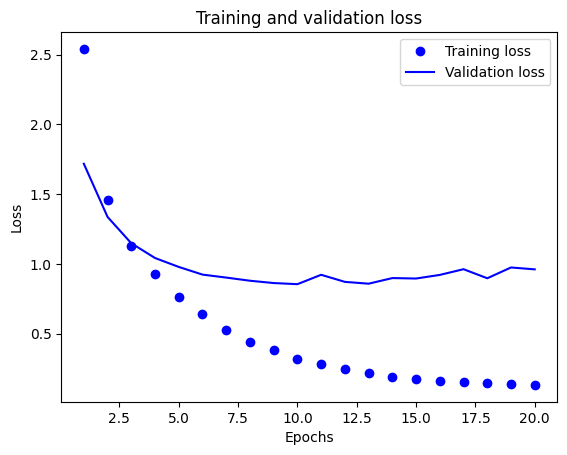

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

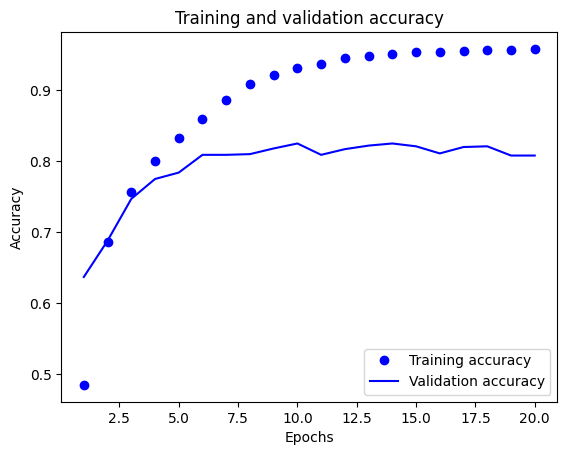

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The model tend to overfit around 12 epochs, we fit a new model with 12 epochs

In [ ]:
new_model =  keras.Sequential([layers.Dense(64,'relu'), layers.Dense(64,'relu'), layers.Dense(46, 'softmax')])

new_model.compile(optimizer='rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
new_model.fit(x_train, y_train, epochs=12, batch_size=512)
results = new_model.evaluate(x_test, y_test)
results

Epoch 1/12
18/18 [==============================] - 1s 44ms/step - loss: 2.7579 - accuracy: 0.5247
Epoch 2/12
18/18 [==============================] - 1s 46ms/step - loss: 1.5204 - accuracy: 0.6869
Epoch 3/12
18/18 [==============================] - 1s 49ms/step - loss: 1.1484 - accuracy: 0.7508
Epoch 4/12
18/18 [==============================] - 1s 75ms/step - loss: 0.9312 - accuracy: 0.7987
Epoch 5/12
18/18 [==============================] - 1s 72ms/step - loss: 0.7724 - accuracy: 0.8304
Epoch 6/12
18/18 [==============================] - 1s 80ms/step - loss: 0.6389 - accuracy: 0.8611
Epoch 7/12
18/18 [==============================] - 1s 49ms/step - loss: 0.5367 - accuracy: 0.8860
Epoch 8/12
18/18 [==============================] - 1s 45ms/step - loss: 0.4455 - accuracy: 0.9068
Epoch 9/12
18/18 [==============================] - 1s 46ms/step - loss: 0.3789 - accuracy: 0.9221
Epoch 10/12
18/18 [==============================] - 1s 46ms/step - loss: 0.3259 - accuracy: 0.9295
Epoch 11/

[0.9569594860076904, 0.792965292930603]

Around 80% accuracy is reached by the new model

# Predictions on test data



In [ ]:
predictions = new_model.predict(x_test)
predictions.shape # prediction of each data point is a vector of length 46
predictions[0].shape # prediction of the first test input
np.sum(predictions[0]) # probabilties sum to 1
np.argmax(predictions[0]) # class with the largest probability


71/71 [==============================] - 1s 9ms/step


(2246, 46)